In [1]:
import torch
from torchvision import transforms
from PIL import Image

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
from instrumented_models.resnet_instrumented import ResNet50_InternalRepresentation

model = ResNet50_InternalRepresentation(num_classes=70, pretrained=False)

weights = torch.load("resnet_epoch_25.pth", map_location=device)
weights = {"model." + k: v for k, v in weights.items()}
model.load_state_dict(weights)

model.to(device)
model.eval()

print(model.__class__.__name__)

num_params = sum(p.numel() for p in model.parameters())
print(f"model parameters: {num_params}")

ResNet50_InternalRepresentation
model parameters: 23651462


In [4]:
img_path = "a5-jsw-1_crop.jpg"
image = Image.open(img_path).convert("RGB")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
input_tensor = transform(image).unsqueeze(0).to(device)

# Forward pass
with torch.no_grad():
    output = model(input_tensor)

# Extract spatial and channel activation maps
spatial_maps, channel_maps = model.get_activation_maps()

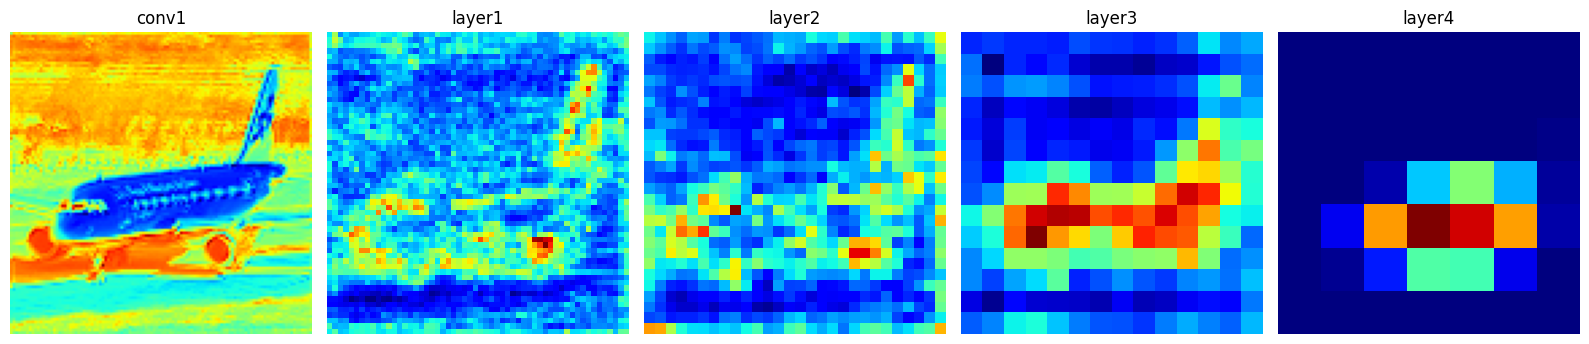

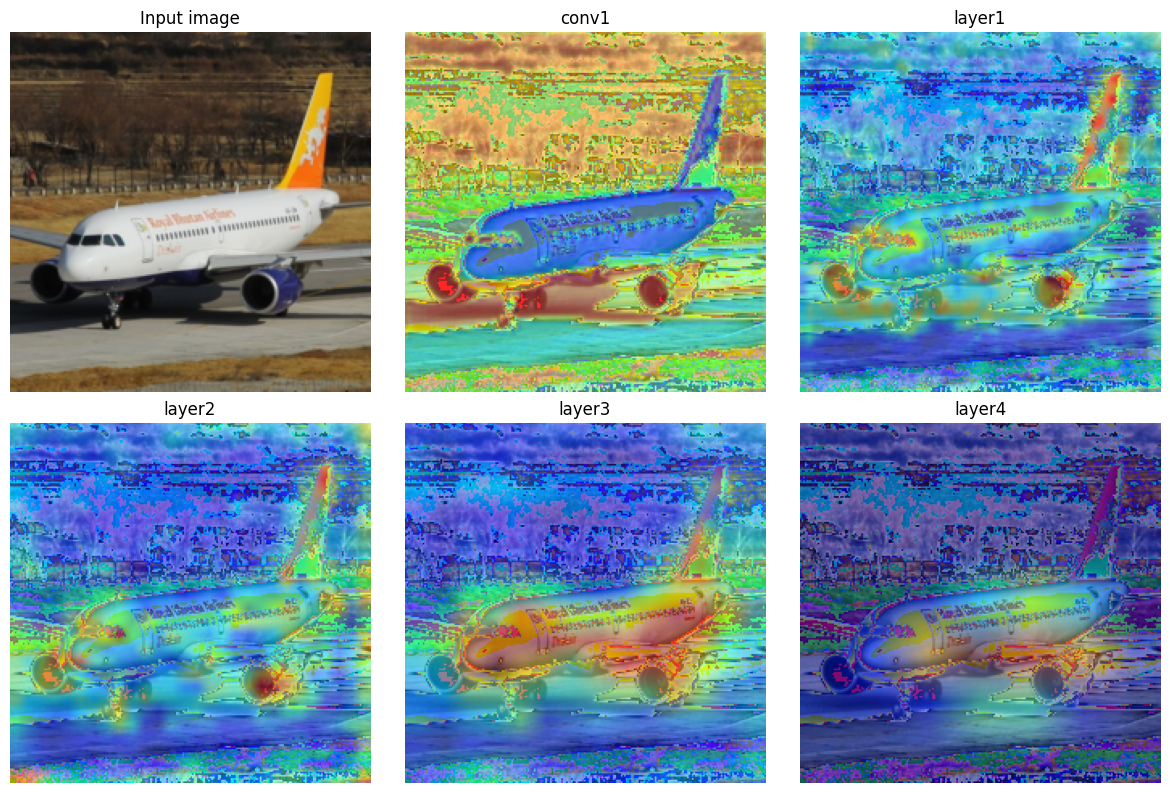

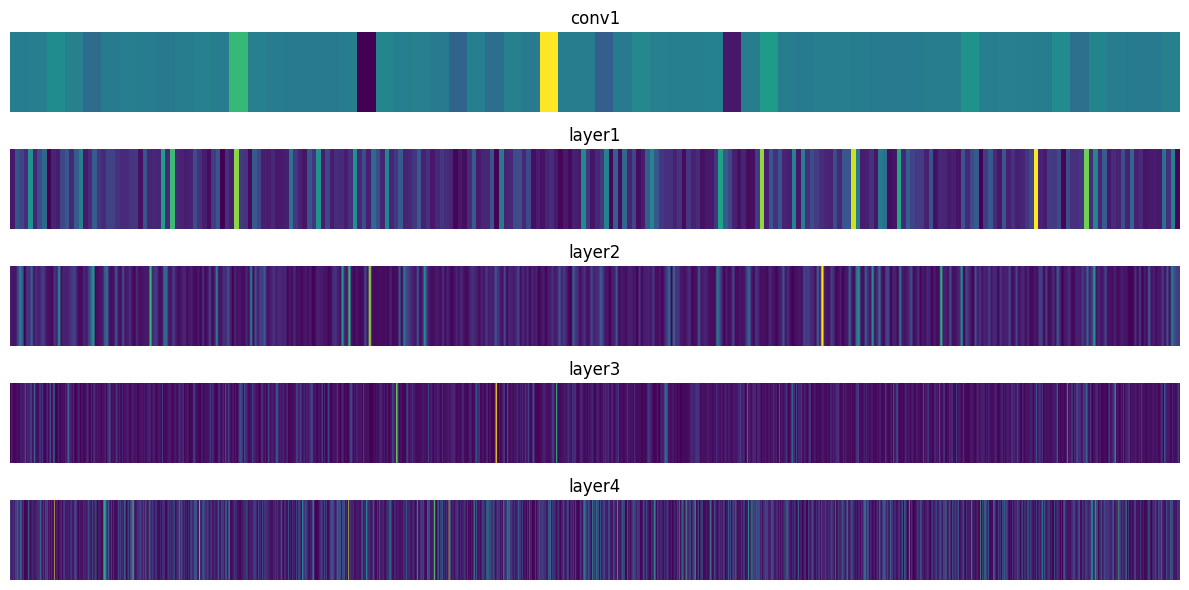

In [5]:
from visualization_utils.resnet_visualization_utils import *

# Plot heatmaps for spatial activation progression
spatial_activation_progression(spatial_maps, input_tensor[0])

# Plot spatial activation progression heatmaps with image overlay
overlays, titles = [], []
for name, fmap in spatial_maps.items():
    overlay = overlay_heatmap_on_image(input_tensor[0], fmap[0])
    overlays.append(overlay)
    titles.append(name)
image_w_spatial_activation_progression(input_tensor[0], overlays, titles=titles)

# Plot heatmaps for channel activation progression
channel_activation_progression(channel_maps)